# TP 1 - Espacios de Color

In [1]:

%reset
%matplotlib inline

# Importamos numpy (libreria de calculo) y le asignamos el nombre "np"
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

import time

import sys, os
sys.path.insert(0, 'Libreria')

import espacios_color as espc

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
TEST_FOLDER = './Imagenes'
OUT_FOLDER = './Salidas'
TEST_IMAGE = 'spacex-rocket-pictures.jpg'
ALPHA_VAL = 0.5
BETA_VAL = 1.2
nom_arch = os.path.join(TEST_FOLDER,TEST_IMAGE)




imag_ini = ndimage.imread(nom_arch, flatten=False, mode='RGB')


/home/rgrodriguez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()


In [3]:
imag_yiq = espc.rgb2yiq(imag_ini)

0
255
123.77145284207243
42.706183872967344


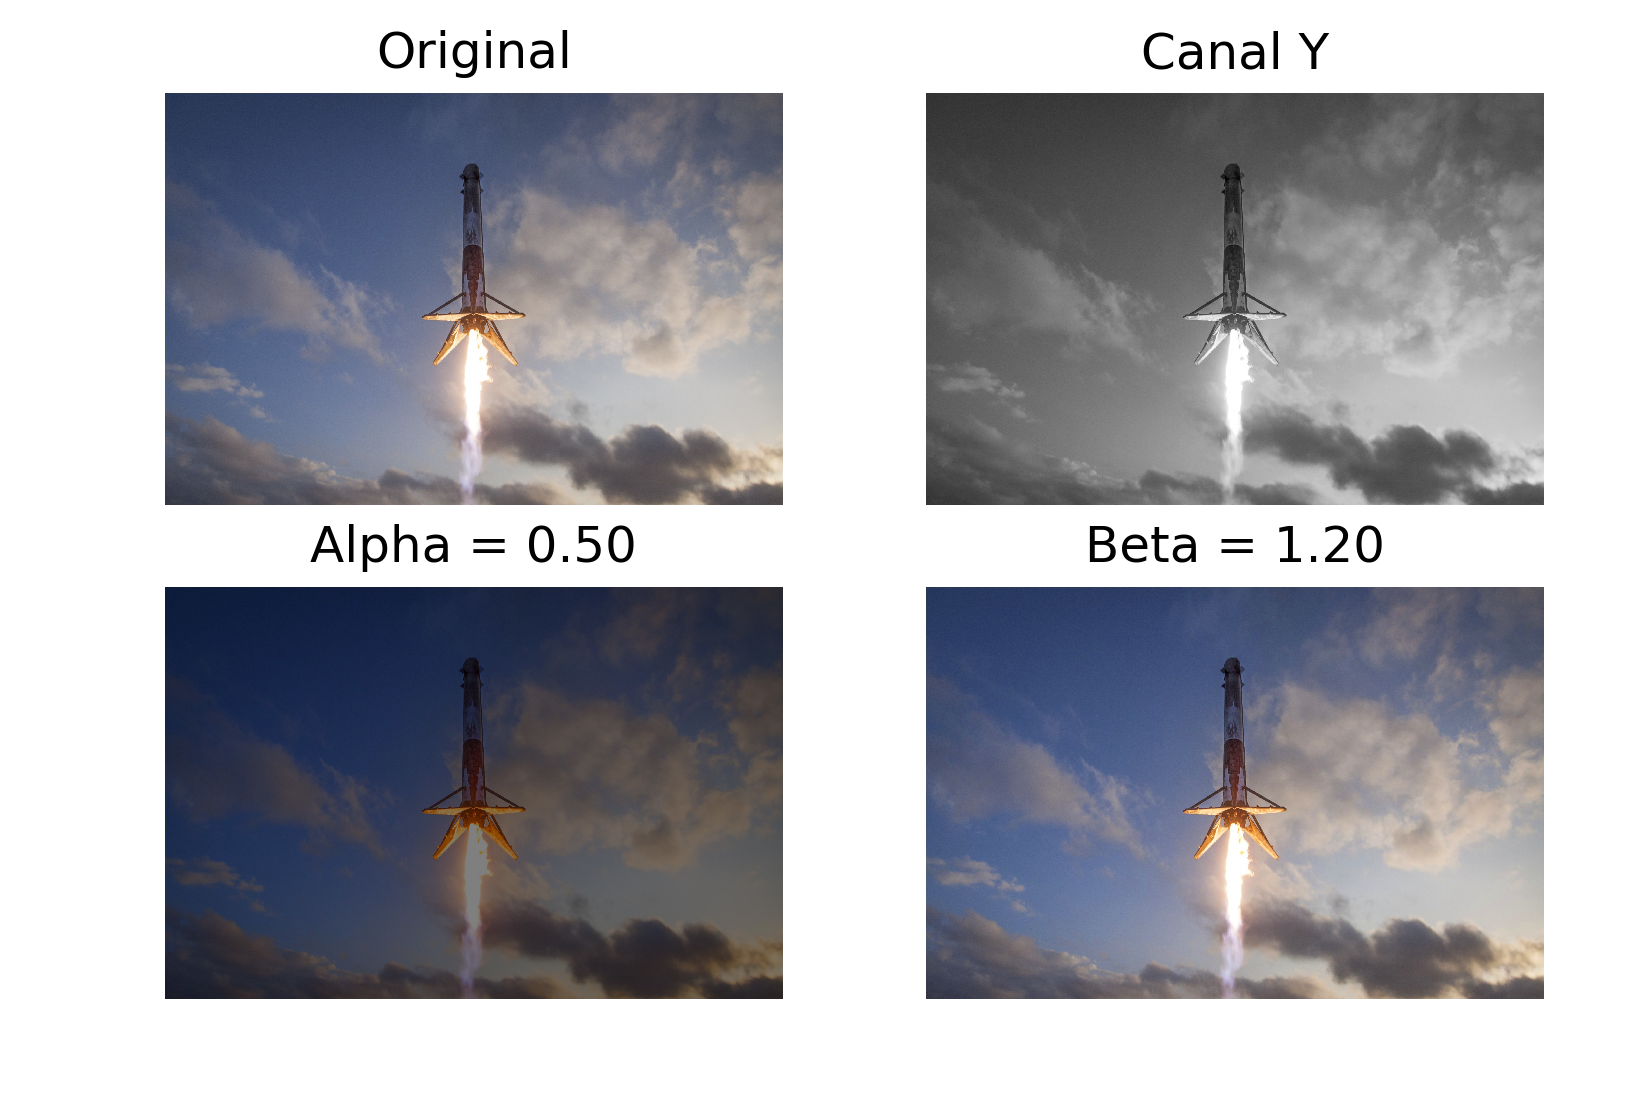

In [4]:
imag_yiq_alpha = espc.aplicar_alpha(imag_yiq, ALPHA_VAL)
imag_yiq_beta = espc.aplicar_beta(imag_yiq, BETA_VAL)


imag_rgb_alpha =  espc.yiq2rgb(imag_yiq_alpha)
imag_rgb_beta =  espc.yiq2rgb(imag_yiq_beta)


plt.figure(dpi=300)
ax = plt.subplot(2,2,1)
ax.imshow(imag_ini)
plt.axis('off')
plt.title('Original')
ax = plt.subplot(2,2,2)
ax.imshow(imag_yiq[:,:,0],  cmap='gray')
plt.axis('off')
plt.title('Canal Y')
ax = plt.subplot(2,2,3)
ax.imshow(imag_rgb_alpha)
plt.axis('off')
plt.title('Alpha = %0.2f'%ALPHA_VAL)
ax = plt.subplot(2,2,4)
ax.imshow(imag_rgb_beta)
plt.axis('off')
plt.title('Beta = %0.2f'%BETA_VAL)

plt.draw()
nom_arch = os.path.join(OUT_FOLDER,'TP1_resultado.png')
plt.savefig(nom_arch)



print(np.min(imag_rgb_beta))
print(np.max(imag_rgb_beta))
print(np.mean(imag_rgb_beta))
print(np.std(imag_rgb_beta))


plt.show()


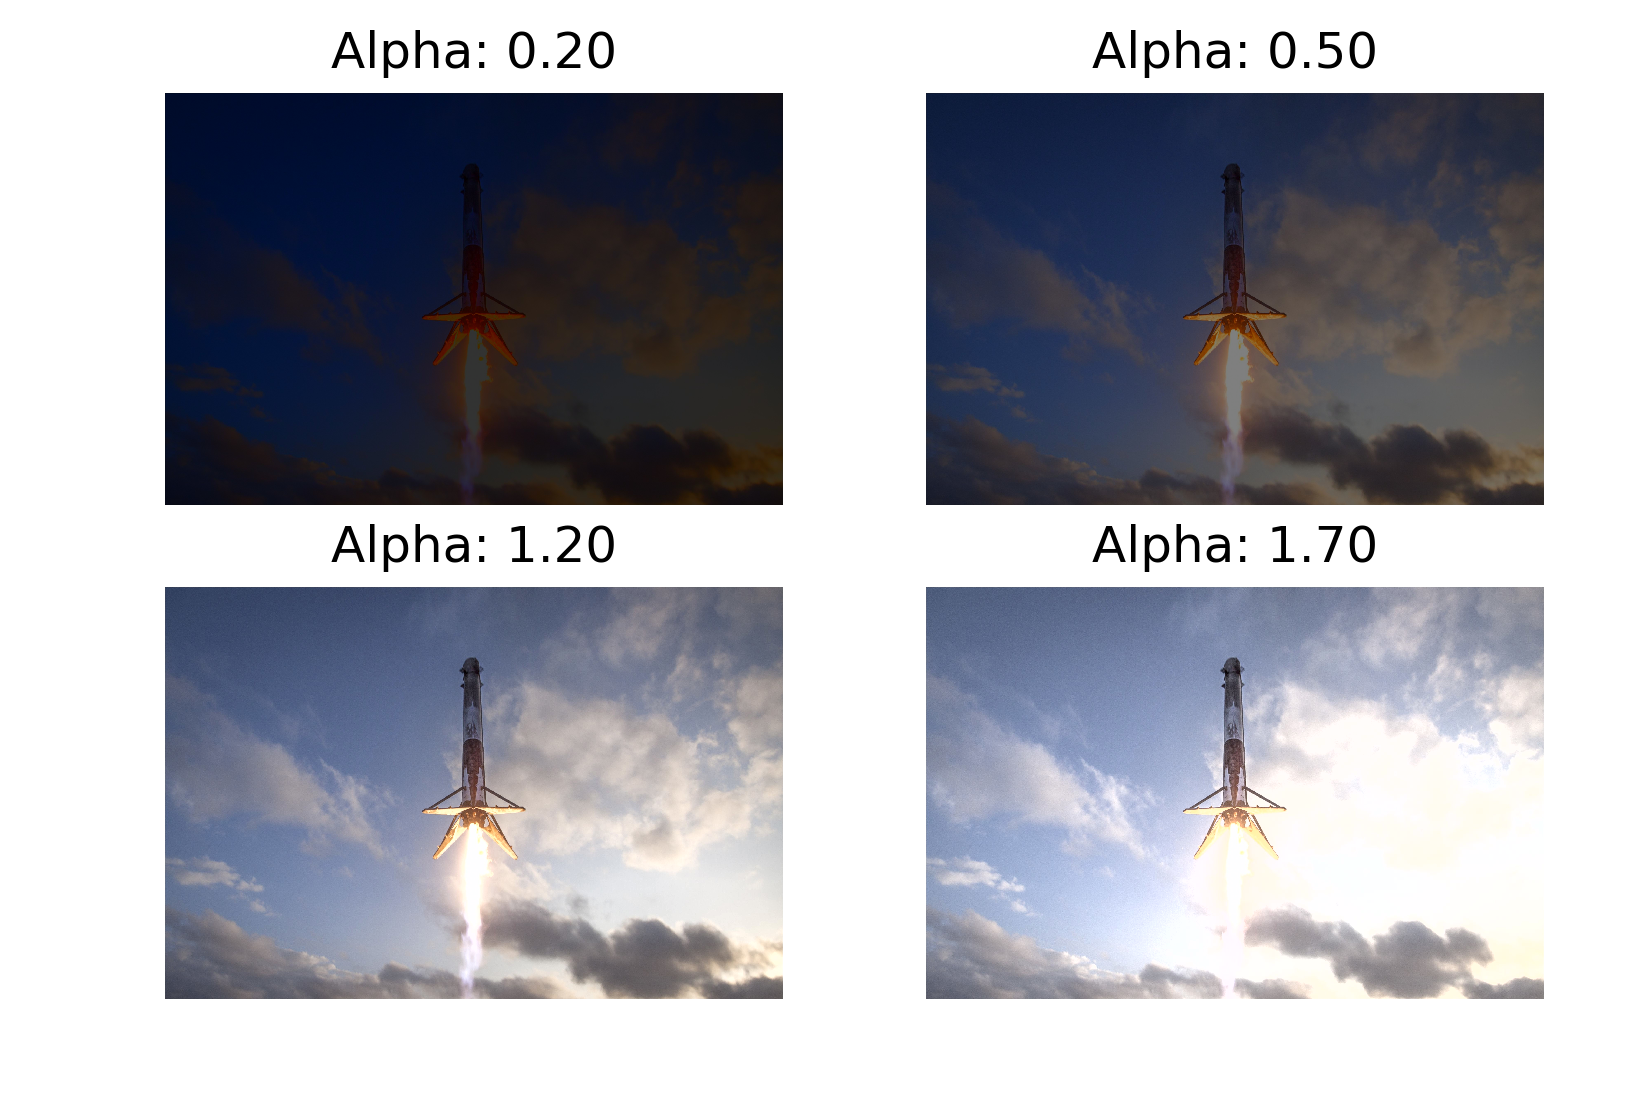

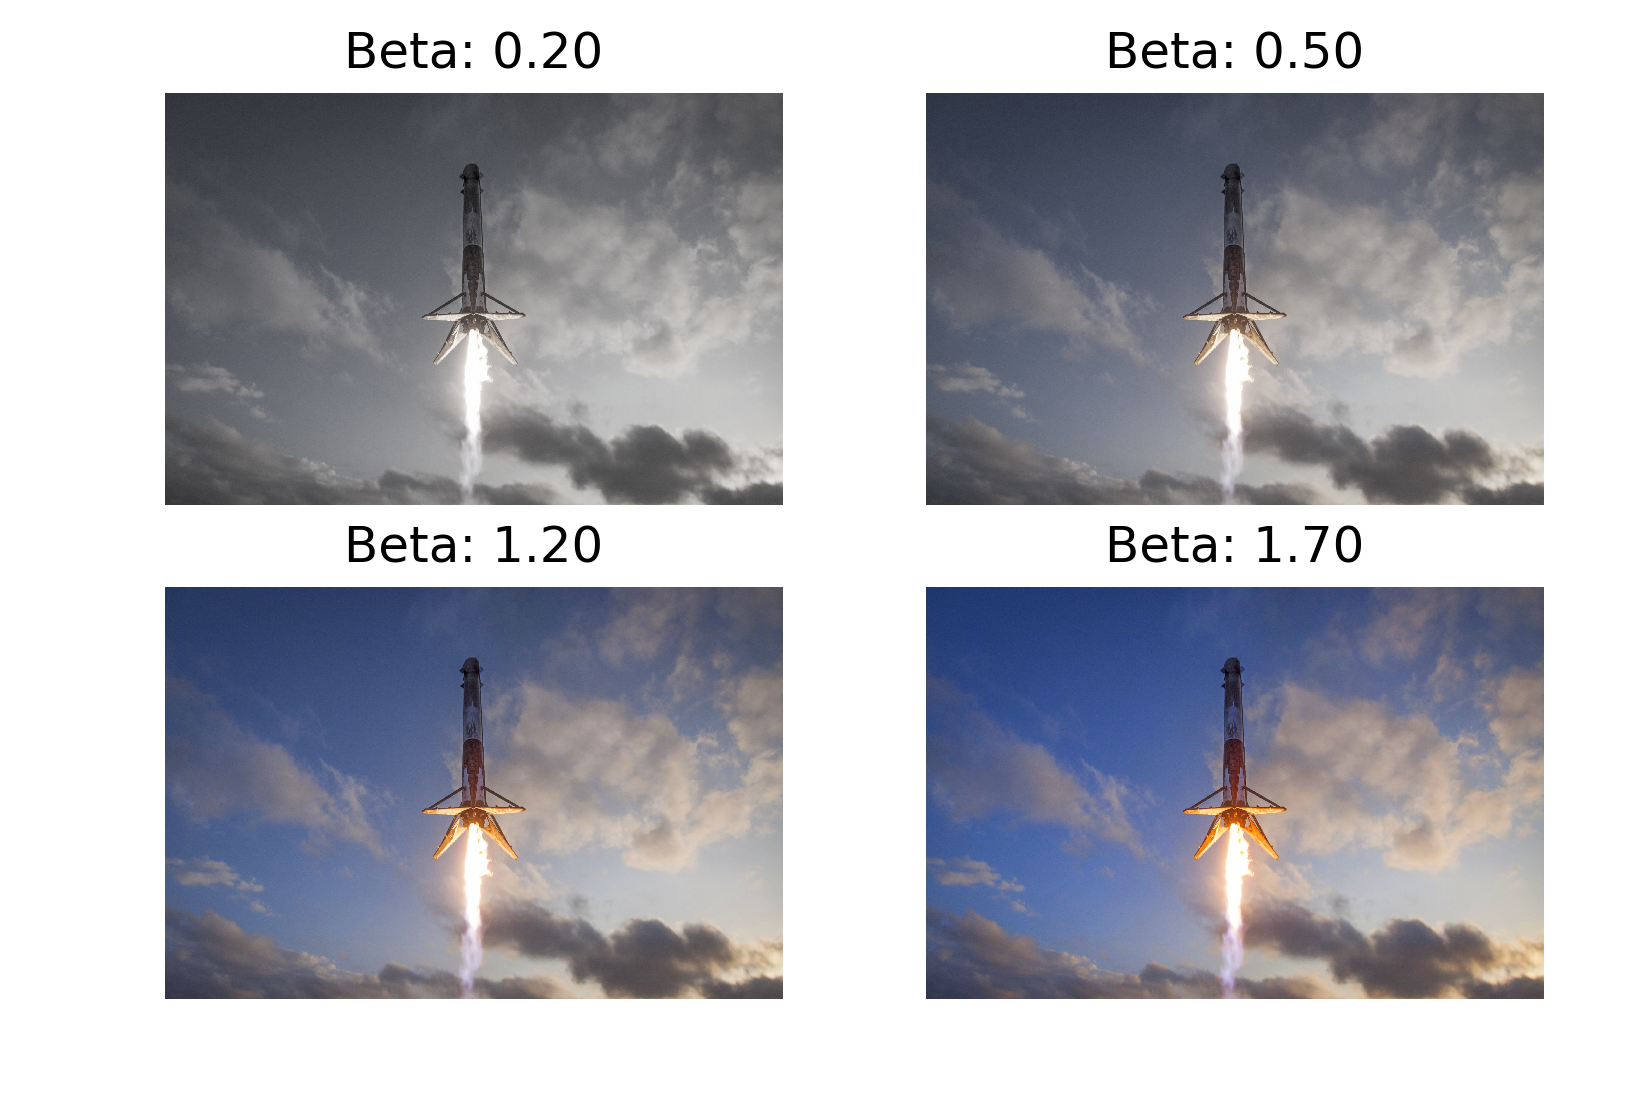

In [6]:
alfas = [0.2, 0.5, 1.2, 1.7]
betas = [0.2, 0.5, 1.2, 1.7]


plt.figure(dpi=300)
for idx in range(4):

    imag_yiq_alpha = espc.aplicar_alpha(imag_yiq, alfas[idx])
    imag_rgb_alpha =  espc.yiq2rgb(imag_yiq_alpha)

    ax = plt.subplot(2,2,idx+1)
    ax.imshow(imag_rgb_alpha)
    plt.axis('off')
    plt.title('Alpha: %0.2f'%alfas[idx])

nom_arch = os.path.join(OUT_FOLDER,'TP1_alfas.png')
plt.savefig(nom_arch)

plt.figure(dpi=300)
for idx in range(4):

    imag_yiq_beta = espc.aplicar_beta(imag_yiq, betas[idx])
    imag_rgb_beta =  espc.yiq2rgb(imag_yiq_beta)

    ax = plt.subplot(2,2,idx+1)
    ax.imshow(imag_rgb_beta)
    plt.axis('off')
    plt.title('Beta: %0.2f'%betas[idx])

plt.draw()
nom_arch = os.path.join(OUT_FOLDER,'TP1_betas.png')
plt.savefig(nom_arch)


plt.show()